In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install selenium==4.7.2

In [3]:
import selenium

In [4]:
from selenium import webdriver

In [5]:
selenium.__version__

'4.7.2'

In [6]:
#extracting Url and executing it
url= "https://www.booking.com/searchresults.en-gb.html?label=norfolk-county-cOvhC9YoN4Ill2hHu3ibyQS541125464537%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-1983705807%3Alp9062134%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTiRJUvwM0AZLEcK3RQ9LlA&sid=1138a4f3c5b988868cd5f1709223d344&aid=1610833&ss=Bangalore%2C+Karnataka%2C+India&ssne=Norfolk&ssne_untouched=Norfolk&lang=en-gb&src=searchresults&dest_id=-2090174&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=c2952f26fac00101&ac_meta=GhBjMjk1MmYyNmZhYzAwMTAxIAAoATICZW46CGJhbmdsb3JlQABKAFAA&checkin=2023-06-22&checkout=2023-06-23&group_adults=2&no_rooms=1&group_children=0&nflt=fc%3D2%3Bht_id%3D204"
page=requests.get(url)
page

<Response [200]>

In [7]:
#Drivers needed for BeautifulSoup
driver=webdriver.Chrome(r"C:\Users\ajayk\Downloads\chromedriver_win32\chromedriver.exe")
driver.get(url)
soup=BeautifulSoup(driver.page_source)
driver.close()

## Hotels 

In [8]:
#Hotel_brands
H1=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    H11=i.find("div",class_="fcab3ed991 a23c043802")
    if H11:
        H1.append(H11.text)
    else:
        H1.append(np.nan)

In [9]:
len(H1)

25

## Areas 

In [10]:
A1=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    e=i.find("span",class_="f4bd0794db b4273d69aa")
    regex=re.findall("(.*), Bangalore",e.text)
    if regex:
        A1.append(regex[0])
    else:
        A1.append("Bangalore")

In [11]:
A1

['Indiranagar',
 'Gandhi nagar',
 'Brookefield',
 'Gandhi nagar',
 'Gandhi nagar',
 'Bangalore Shopping Area',
 'Koramangala',
 'Kalyan Nagar',
 'Brookefield',
 'Koramangala',
 'Bangalore',
 'Indiranagar',
 'Bangalore Shopping Area',
 'Indiranagar',
 'Whitefield',
 'MG Road',
 'Marathahalli',
 'Bangalore',
 'Indiranagar',
 'Gandhi nagar',
 'Bangalore',
 'BTM Layout',
 'Bangalore',
 'Kadubeesanahalli',
 'Whitefield']

In [12]:
len(A1)

25

## Rooms 

In [13]:
#Rooms
rom=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    t=i.find("span",class_="df597226dd")
    regex=re.findall("(^\w+)",i.text)     
    if regex:
        rom.append(regex[0])
    else:
        rom.append("Standard")

## Adults 

In [14]:
#adults
fr1=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    fr=i.find("div",class_="d8eab2cf7f c90c0a70d3")
    if fr:
        fr1.append(fr.text.split(", ")[1])
    else:
        fr1.append(np.nan)

## Breakfast 

In [15]:
#breakfast
break1=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    j=i.find("span",class_="e05969d63d")
    if j:
        break1.append(j.text)
    else:
        break1.append("No breakfast Included")

## Payment Method 

In [16]:
#payments
pm2=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    pp=i.find("div",class_="f7db4eb605")
    if pp:
        pm2.append(pp.text)
    else:
        pm2.append("Pre-Payment Required")

## Price 

In [17]:
#prices
prices=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    regex=re.findall("(₹\s(\d+,?\d+))",i.text)
    prices.append(regex)

## Ratings 

In [18]:
#Rating
Ratt=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    a=i.find("div",class_="b5cd09854e d10a6220b4")
    if a:
        Ratt.append(a.text)
    else:
        Ratt.append(np.nan)

## Review_score

In [19]:
#Review_Score
Re=[]
for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
    k=i.find("div",class_="b5cd09854e f0d4d6a2f5 e46e88563a")
    if k:
        Re.append(k.text)
    else:
        Re.append(np.nan)

## For loop 1 

In [20]:
H1=[]
A1=[]
prices=[]
rom=[]
pm2=[]
break1=[]
fr1=[]
Ratt=[]  
Re=[]




for i in range(1,250,25):
    urls=f"https://www.booking.com/searchresults.en-gb.html?label=norfolk-county-cOvhC9YoN4Ill2hHu3ibyQS541125464537%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-1983705807%3Alp9062134%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTiRJUvwM0AZLEcK3RQ9LlA&sid=b588fd593b2cb7f4268aa466aa36a58b&aid=1610833&ss=Bangalore&ssne=Bangalore&ssne_untouched=Bangalore&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2090174&dest_type=city&checkin=2023-06-29&checkout=2023-06-30&group_adults=1&no_rooms=1&group_children=0&offset={i}"
    driver=webdriver.Chrome(r"C:\Users\ajayk\Downloads\chromedriver_win32\chromedriver.exe")
    driver.get(urls)
    soup=BeautifulSoup(driver.page_source)
    driver.close()

    #Hotel_brands
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        H11=i.find("div",class_="fcab3ed991 a23c043802")
        if H11:
            H1.append(H11.text)
        else:
            H1.append(np.nan)

    #A1
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        e=i.find("span",class_="f4bd0794db b4273d69aa")
        regex=re.findall("(.*), Bangalore",e.text)
        if regex:
            A1.append(regex[0])
        else:
            A1.append("Bangalore")
            
    #prices
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        regex=re.findall("(₹\s(\d+,?\d+))",i.text)
        prices.append(regex[0][1])
        
        
    #Rooms
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        t=i.find("span",class_="df597226dd")
        regex=re.findall("(^\w+)",t.text)     
        if regex:
            rom.append(regex[0])
        else:
            rom.append("Standard")
    
            
    #payments
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        pp=i.find("div",class_="f7db4eb605")
        if pp:
            pm2.append(pp.text)
        else:
            pm2.append("Pre-Payment Required")
    
    #breakfast
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        j=i.find("span",class_="e05969d63d")
        if j:
            break1.append(j.text)
        else:
            break1.append("No breakfast Included")
            
    #adults
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        fr=i.find("div",class_="d8eab2cf7f c90c0a70d3")
        if fr:
            fr1.append(fr.text.split(", ")[1])
        else:
            fr1.append(np.nan)
        

    
    #Rating
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        a=i.find("div",class_="b5cd09854e d10a6220b4")
        if a:
            Ratt.append(a.text)
        else:
            Ratt.append(np.nan)
    
    #Review_Score
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        k=i.find("div",class_="b5cd09854e f0d4d6a2f5 e46e88563a")
        if k:
            Re.append(k.text)
        else:
            Re.append(np.nan)

In [21]:
df1={"Hotels": H1,
   "Area(In Bangalore)": A1,
   "Room_Type": rom,
   "Adults": fr1,
    "Breakfast": break1,
   "Payment Method": pm2,
    "price(In Thousands)": prices,
    "Ratings":Ratt,
    "Review_score":Re,
  }

In [22]:
df2=pd.DataFrame(df1)
df2

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,Zenith Hotels Hebbal Bangalore,Bangalore,Deluxe,1 adult,Breakfast included,No prepayment needed,"4,000",8.4,Very good
1,Courtyard by Marriott Bengaluru Outer Ring Road,Bellandur,Guest,1 adult,Breakfast included,No prepayment needed,"13,250",8.5,Very good
2,Taj West End,Bangalore,Luxury,1 adult,No breakfast Included,Pre-Payment Required,"9,000",8.3,Very good
3,The Oberoi Bengaluru,MG Road,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"10,500",9.3,Superb
4,Taj MG Road Bengaluru,MG Road,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"8,500",8.7,Fabulous
...,...,...,...,...,...,...,...,...,...
246,Atlaantic Inn,Bangalore,Executive,1 adult,No breakfast Included,No prepayment needed,"1,400",6.6,Review score
247,Hotel Arafa Inn,Gandhi nagar,Deluxe,1 adult,No breakfast Included,No prepayment needed,"1,662",7.2,Good
248,Octave Suites - Residency Rd,MG Road,Deluxe,1 adult,No breakfast Included,No prepayment needed,"2,775",7.6,Good
249,Treebo Trend Galaxy Suites Mathikere,Yeshwantpur,Standard,1 adult,Breakfast included,No prepayment needed,"6,162",8.0,Very good


## For Loop 2 

In [23]:
Hotels=[]
Area=[]
r_t=[]
Adults=[]
break2=[]
pm1 =[]
price1 = []
Rati=[]
Rev=[]

for i in range(1,250,25):
    urls=f"https://www.booking.com/searchresults.en-gb.html?label=norfolk-county-cOvhC9YoN4Ill2hHu3ibyQS541125464537%3Apl%3Ata%3Ap1%3Ap2%3Aac%3Aap%3Aneg%3Afi%3Atikwd-1983705807%3Alp9062134%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9YTiRJUvwM0AZLEcK3RQ9LlA&sid=b588fd593b2cb7f4268aa466aa36a58b&aid=1610833&ss=Bangalore&ssne=Bangalore&ssne_untouched=Bangalore&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2090174&dest_type=city&checkin=2023-06-29&checkout=2023-06-30&group_adults=2&no_rooms=1&group_children=0&offset={i}"
    driver=webdriver.Chrome(r"C:\Users\ajayk\Downloads\chromedriver_win32\chromedriver.exe")
    driver.get(urls)
    soup=BeautifulSoup(driver.page_source)
    driver.close()

    #Hotels
    h=soup.find_all("a",class_="e13098a59f")


    for i in h:
        regex=re.findall("(.*)Opens",i.text)
        Hotels.append(regex[0])

    #Area
    Area1= soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942")


    for i in Area1:
        a=i.find("span",class_="f4bd0794db b4273d69aa")
        regex=re.findall("(.*), Bangalore",a.text)
        if regex:
            Area.append(regex[0])
        else:
            Area.append("Bangalore")

    #Room_Type
    RT= soup.find_all("span",class_="df597226dd")


    for i in RT:
        regex=re.findall("(^\w+)",i.text)     
        if regex:
            r_t.append(regex[0])
        else:
            r_t.append(np.nan)



    #Number.of Adults
    A= soup.find_all("div",class_="d8eab2cf7f c90c0a70d3")

    for i in A:
        regex=re.findall("(\d\sadults)",i.text)
        if regex:
            Adults.append(regex[0])
            
    #breakfast
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        j=i.find("span",class_="e05969d63d")
        if j:
            break2.append(j.text)
        else:
            break2.append("No breakfast Included")



    #Payment method
    pm=soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942")


    for i in pm:
        p=i.find("div",class_="f7db4eb605")
        if p:
            pm1.append(p.text)
        else:
            pm1.append("Pre-Payment Required")



    #price
    price = soup.find_all("div",class_="a1b3f50dcd be36d14cea f7c6687c3d e62c1da9f5")


    for i in price:
        regex=re.findall("(₹\s(\d+,?\d+))",i.text)
        price1.append(regex[0][1])


        
    #Rating
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        a=i.find("div",class_="b5cd09854e d10a6220b4")
        if a:
            Rati.append(a.text)
        else:
            Rati.append(np.nan)
    
    #Review_Score
    for i in soup.find_all("div",class_="a826ba81c4 fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"):
        k=i.find("div",class_="b5cd09854e f0d4d6a2f5 e46e88563a")
        if k:
            Rev.append(k.text)
        else:
            Rev.append(np.nan)        
        


In [24]:
df3={"Hotels": Hotels,
   "Area(In Bangalore)": Area,
   "Room_Type": r_t,
   "Adults": Adults,
    "Breakfast": break2,
   "Payment Method": pm1,
    "price(In Thousands)": price1,
    "Ratings":Rati,
    "Review_score":Rev,
  }

In [25]:
df4=pd.DataFrame(df3)
df4

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,Zenith Hotels Hebbal Bangalore,Bangalore,Deluxe,2 adults,Breakfast included,Pre-Payment Required,"4,000",8.4,Very good
1,Courtyard by Marriott Bengaluru Outer Ring Road,Bellandur,Guest,2 adults,Breakfast included,Pre-Payment Required,"14,250",8.5,Very good
2,Taj West End,Bangalore,Luxury,2 adults,No breakfast Included,Pre-Payment Required,"10,000",8.3,Very good
3,Treebo Trend Howell Suites,Bangalore Shopping Area,Standard,2 adults,No breakfast Included,Pre-Payment Required,"4,863",6.4,Review score
4,Taj Yeshwantpur Bengaluru,Yeshwantpur,Superior,2 adults,No breakfast Included,Pre-Payment Required,"7,500",8.7,Fabulous
...,...,...,...,...,...,...,...,...,...
246,Dhoni Homes -Premium 1 BHK Service Apartment M...,Bangalore,One,2 adults,Breakfast included,No prepayment needed,"1,800",10,Exceptional
247,The President Hotel,Jayanagar,Comfort,2 adults,Breakfast included,No prepayment needed,"4,900",7.4,Good
248,FabHotel The BTM Palace,BTM Layout,Deluxe,2 adults,No breakfast Included,Pre-Payment Required,"4,583",8.8,Fabulous
249,Octave Brookefield Suites,Bangalore,Deluxe,2 adults,No breakfast Included,No prepayment needed,"1,625",7.8,Good


In [26]:
F= pd.concat([df2,df4],axis=0)
F

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,Zenith Hotels Hebbal Bangalore,Bangalore,Deluxe,1 adult,Breakfast included,No prepayment needed,"4,000",8.4,Very good
1,Courtyard by Marriott Bengaluru Outer Ring Road,Bellandur,Guest,1 adult,Breakfast included,No prepayment needed,"13,250",8.5,Very good
2,Taj West End,Bangalore,Luxury,1 adult,No breakfast Included,Pre-Payment Required,"9,000",8.3,Very good
3,The Oberoi Bengaluru,MG Road,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"10,500",9.3,Superb
4,Taj MG Road Bengaluru,MG Road,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"8,500",8.7,Fabulous
...,...,...,...,...,...,...,...,...,...
246,Dhoni Homes -Premium 1 BHK Service Apartment M...,Bangalore,One,2 adults,Breakfast included,No prepayment needed,"1,800",10,Exceptional
247,The President Hotel,Jayanagar,Comfort,2 adults,Breakfast included,No prepayment needed,"4,900",7.4,Good
248,FabHotel The BTM Palace,BTM Layout,Deluxe,2 adults,No breakfast Included,Pre-Payment Required,"4,583",8.8,Fabulous
249,Octave Brookefield Suites,Bangalore,Deluxe,2 adults,No breakfast Included,No prepayment needed,"1,625",7.8,Good


In [27]:
final1= F.sample(500)

In [28]:
Final=final1.reset_index(drop=True)

In [29]:
Final.head(30)

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"5,489",7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,"3,820",8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,"6,390",7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,Two,2 adults,No breakfast Included,No prepayment needed – pay at the property,"3,400",9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,"15,500",8.2,Very good
5,"Welcomhotel by ITC Hotels, Richmond Road, Beng...",MG Road,Deluxe,2 adults,No breakfast Included,Pre-Payment Required,"8,700",8.2,Very good
6,FabHotel Emerald Inn,Jayanagar,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"3,000",7.7,Good
7,"ITC Gardenia, a Luxury Collection Hotel, Benga...",Bangalore,Towers,2 adults,Breakfast included,Pre-Payment Required,"10,800",8.5,Very good
8,Conrad Bengaluru,Ulsoor,Deluxe,1 adult,Breakfast included,No prepayment needed – pay at the property,"11,000",8.3,Very good
9,Treebo Trend Tierra Woods Koramangala,Koramangala,Standard,1 adult,Breakfast included,No prepayment needed,"4,168",6.9,Review score


In [30]:
Final

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"5,489",7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,"3,820",8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,"6,390",7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,Two,2 adults,No breakfast Included,No prepayment needed – pay at the property,"3,400",9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,"15,500",8.2,Very good
...,...,...,...,...,...,...,...,...,...
495,Royal Ace Boutique Hotel - Manyata Techpark,Nagavara,Deluxe,1 adult,Breakfast included,No prepayment needed,"1,980",8.4,Very good
496,Zostel Bangalore,Indiranagar,Bed,1 adult,No breakfast Included,Pre-Payment Required,699,8.6,Fabulous
497,Goldfinch Hotel Bangalore,Gandhi nagar,Superior,2 adults,No breakfast Included,No prepayment needed – pay at the property,"3,749",7.2,Good
498,Octave Himalaya Monarch,Gandhi nagar,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"1,225",7.9,Good


In [31]:
Final["Room_Type"]=Final["Room_Type"].str.replace('Two','comfort')

In [32]:
Final["Room_Type"]=Final["Room_Type"].str.replace('Two','Double')

In [33]:
Final["Room_Type"]=Final["Room_Type"].str.replace('One','Luxury')

In [34]:
Final["Room_Type"]=Final["Room_Type"].str.replace('The','Twin')

In [35]:
Final["Room_Type"]=Final["Room_Type"].str.replace('6','comfort')

In [36]:
Final

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"5,489",7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,"3,820",8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,"6,390",7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,comfort,2 adults,No breakfast Included,No prepayment needed – pay at the property,"3,400",9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,"15,500",8.2,Very good
...,...,...,...,...,...,...,...,...,...
495,Royal Ace Boutique Hotel - Manyata Techpark,Nagavara,Deluxe,1 adult,Breakfast included,No prepayment needed,"1,980",8.4,Very good
496,Zostel Bangalore,Indiranagar,Bed,1 adult,No breakfast Included,Pre-Payment Required,699,8.6,Fabulous
497,Goldfinch Hotel Bangalore,Gandhi nagar,Superior,2 adults,No breakfast Included,No prepayment needed – pay at the property,"3,749",7.2,Good
498,Octave Himalaya Monarch,Gandhi nagar,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,"1,225",7.9,Good


## Data Cleaning 

In [37]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hotels               500 non-null    object
 1   Area(In Bangalore)   500 non-null    object
 2   Room_Type            486 non-null    object
 3   Adults               500 non-null    object
 4   Breakfast            500 non-null    object
 5   Payment Method       500 non-null    object
 6   price(In Thousands)  500 non-null    object
 7   Ratings              482 non-null    object
 8   Review_score         482 non-null    object
dtypes: object(9)
memory usage: 35.3+ KB


## Type Conversion 

In [38]:
Final["Ratings"]=Final["Ratings"].astype("float")

In [39]:
Final["Ratings"]

0      7.2
1      8.3
2      7.3
3      9.6
4      8.2
      ... 
495    8.4
496    8.6
497    7.2
498    7.9
499    7.3
Name: Ratings, Length: 500, dtype: float64

In [40]:
Final["price(In Thousands)"]

0       5,489
1       3,820
2       6,390
3       3,400
4      15,500
        ...  
495     1,980
496       699
497     3,749
498     1,225
499     6,390
Name: price(In Thousands), Length: 500, dtype: object

In [41]:
Final["price(In Thousands)"]=Final["price(In Thousands)"].str.replace(',','')

In [42]:
Final["price(In Thousands)"]

0       5489
1       3820
2       6390
3       3400
4      15500
       ...  
495     1980
496      699
497     3749
498     1225
499     6390
Name: price(In Thousands), Length: 500, dtype: object

In [43]:
Final["price(In Thousands)"]=Final["price(In Thousands)"].astype("int")

In [44]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotels               500 non-null    object 
 1   Area(In Bangalore)   500 non-null    object 
 2   Room_Type            486 non-null    object 
 3   Adults               500 non-null    object 
 4   Breakfast            500 non-null    object 
 5   Payment Method       500 non-null    object 
 6   price(In Thousands)  500 non-null    int32  
 7   Ratings              482 non-null    float64
 8   Review_score         482 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 33.3+ KB


In [45]:
Final.isnull().sum()

Hotels                  0
Area(In Bangalore)      0
Room_Type              14
Adults                  0
Breakfast               0
Payment Method          0
price(In Thousands)     0
Ratings                18
Review_score           18
dtype: int64

In [46]:
Final["Ratings"]

0      7.2
1      8.3
2      7.3
3      9.6
4      8.2
      ... 
495    8.4
496    8.6
497    7.2
498    7.9
499    7.3
Name: Ratings, Length: 500, dtype: float64

In [47]:
median=Final["Ratings"].median()
median

7.8

In [48]:
Final["Ratings"]=Final["Ratings"].fillna(median)
Final["Ratings"]

0      7.2
1      8.3
2      7.3
3      9.6
4      8.2
      ... 
495    8.4
496    8.6
497    7.2
498    7.9
499    7.3
Name: Ratings, Length: 500, dtype: float64

In [49]:
Final["Review_score"]

0             Good 
1        Very good 
2             Good 
3      Exceptional 
4        Very good 
           ...     
495      Very good 
496       Fabulous 
497           Good 
498           Good 
499           Good 
Name: Review_score, Length: 500, dtype: object

In [50]:
mode=Final["Review_score"].mode()

In [51]:
mode

0    Good 
Name: Review_score, dtype: object

In [52]:
Final.isnull().sum()

Hotels                  0
Area(In Bangalore)      0
Room_Type              14
Adults                  0
Breakfast               0
Payment Method          0
price(In Thousands)     0
Ratings                 0
Review_score           18
dtype: int64

In [53]:
Final["Review_score"]=Final["Review_score"].fillna(mode[0])

In [54]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotels               500 non-null    object 
 1   Area(In Bangalore)   500 non-null    object 
 2   Room_Type            486 non-null    object 
 3   Adults               500 non-null    object 
 4   Breakfast            500 non-null    object 
 5   Payment Method       500 non-null    object 
 6   price(In Thousands)  500 non-null    int32  
 7   Ratings              500 non-null    float64
 8   Review_score         500 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 33.3+ KB


In [55]:
mode=Final["Room_Type"].mode()

In [56]:
mode

0    Deluxe
Name: Room_Type, dtype: object

In [57]:
#Why Mode?
#Just for pulling data or cleaning data usage of mode is required
Final["Room_Type"]=Final["Room_Type"].fillna(mode[0])

In [58]:
Final["Room_Type"]

0        Deluxe
1      Standard
2        Deluxe
3       comfort
4        Deluxe
         ...   
495      Deluxe
496         Bed
497    Superior
498      Deluxe
499      Deluxe
Name: Room_Type, Length: 500, dtype: object

In [59]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotels               500 non-null    object 
 1   Area(In Bangalore)   500 non-null    object 
 2   Room_Type            500 non-null    object 
 3   Adults               500 non-null    object 
 4   Breakfast            500 non-null    object 
 5   Payment Method       500 non-null    object 
 6   price(In Thousands)  500 non-null    int32  
 7   Ratings              500 non-null    float64
 8   Review_score         500 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 33.3+ KB


In [60]:
Final.to_csv("FINAL.csv")

In [61]:
pwd

'C:\\Users\\ajayk\\1111 Project webscraping'

## Data Analysis 
   - Uni variant
   - Bi Variant
   - Multi Variant

In [62]:
Final.columns

Index(['Hotels', 'Area(In Bangalore)', 'Room_Type', 'Adults', 'Breakfast',
       'Payment Method', 'price(In Thousands)', 'Ratings', 'Review_score'],
      dtype='object')

In [63]:
Final["Area(In Bangalore)"]

0                    Bangalore
1                  Brookefield
2                 Marathahalli
3                       Hebbal
4      Bangalore Shopping Area
                ...           
495                   Nagavara
496                Indiranagar
497               Gandhi nagar
498               Gandhi nagar
499               Marathahalli
Name: Area(In Bangalore), Length: 500, dtype: object

In [64]:
Final["Area(In Bangalore)"].unique()

array(['Bangalore', 'Brookefield', 'Marathahalli', 'Hebbal',
       'Bangalore Shopping Area', 'MG Road', 'Jayanagar', 'Ulsoor',
       'Koramangala', 'HSR Layout', 'Indiranagar', 'Gandhi nagar',
       'Nagavara', 'Sheshadripuram', 'Bommasandra', 'Kalyan Nagar',
       'Electronic City', 'Yelahanka', 'HBR Layout', 'BTM Layout',
       'Bellandur', 'Whitefield', 'JP Nagar', 'Rajaji Nagar',
       'Sudhama Nagar', 'Yeshwantpur', 'Kadubeesanahalli'], dtype=object)

In [65]:
Final["Area(In Bangalore)"].value_counts()

Bangalore                  198
Indiranagar                 30
Koramangala                 26
Gandhi nagar                22
Brookefield                 21
Nagavara                    21
Bangalore Shopping Area     20
Jayanagar                   19
Marathahalli                18
MG Road                     18
Bellandur                   17
Whitefield                  13
Electronic City             12
HSR Layout                   9
JP Nagar                     9
BTM Layout                   9
Ulsoor                       7
Yeshwantpur                  6
Rajaji Nagar                 5
Yelahanka                    5
HBR Layout                   5
Sheshadripuram               3
Sudhama Nagar                2
Kadubeesanahalli             2
Kalyan Nagar                 1
Bommasandra                  1
Hebbal                       1
Name: Area(In Bangalore), dtype: int64

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
Final["Review_score"]=Final["Review_score"].str.replace('Review score','Fabulous')

In [68]:
Final

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,5489,7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,3820,8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,6390,7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,comfort,2 adults,No breakfast Included,No prepayment needed – pay at the property,3400,9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,15500,8.2,Very good
...,...,...,...,...,...,...,...,...,...
495,Royal Ace Boutique Hotel - Manyata Techpark,Nagavara,Deluxe,1 adult,Breakfast included,No prepayment needed,1980,8.4,Very good
496,Zostel Bangalore,Indiranagar,Bed,1 adult,No breakfast Included,Pre-Payment Required,699,8.6,Fabulous
497,Goldfinch Hotel Bangalore,Gandhi nagar,Superior,2 adults,No breakfast Included,No prepayment needed – pay at the property,3749,7.2,Good
498,Octave Himalaya Monarch,Gandhi nagar,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,1225,7.9,Good


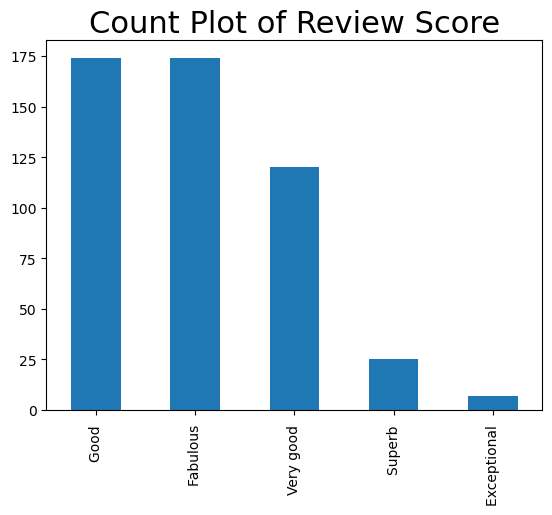

In [149]:
#1
Final["Review_score"].value_counts().plot(kind= "bar")
plt.title("Count Plot of Review Score",fontsize= 22)
plt.show()

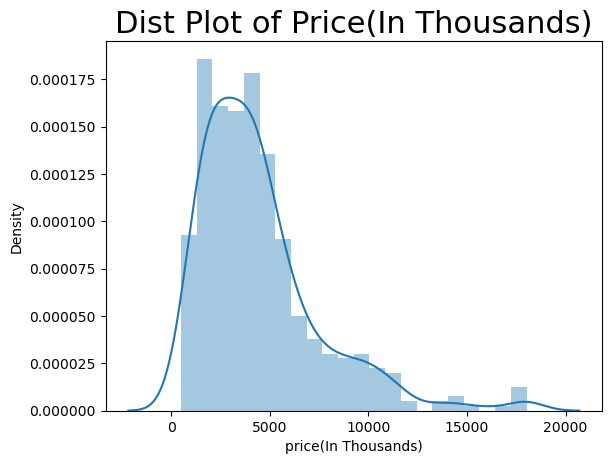

In [150]:
#2
sns.distplot(Final["price(In Thousands)"])
plt.title("Dist Plot of Price(In Thousands)", fontsize=22)
plt.show()

In [71]:
Final["price(In Thousands)"]

0       5489
1       3820
2       6390
3       3400
4      15500
       ...  
495     1980
496      699
497     3749
498     1225
499     6390
Name: price(In Thousands), Length: 500, dtype: int32

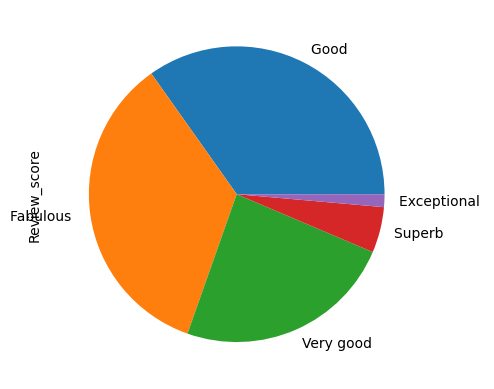

In [72]:
Final["Review_score"].value_counts().plot(kind = "pie")
plt.show()

In [73]:
Final["Hotels"].nunique()

293

In [74]:
Final["Hotels"].value_counts()

Zenith Hotels Hebbal Bangalore           5
Sarovar Portico Outer Ring Road          4
Vistar Resort & Hotels                   4
Stayhome Suites                          4
Ds cozie comforts inn                    4
                                        ..
Hotel Chetan International               1
FabHotel Sri Krishna Suites Bellandur    1
OYO Flagship 81360 Tranquil Inn          1
37th Crescent Hotel Bengaluru            1
Zostel Bangalore                         1
Name: Hotels, Length: 293, dtype: int64

In [75]:
Final["price(In Thousands)"].max()

18020

In [76]:
Final["price(In Thousands)"].min()

500

In [77]:
Final.describe()

,price(In Thousands),Ratings
count,500.00000,500.000000
mean,4450.23800,7.641200
std,3086.13369,1.168775
min,500.00000,1.000000
25%,2270.25000,7.100000
50%,3800.50000,7.800000
75%,5558.25000,8.400000
max,18020.00000,10.000000


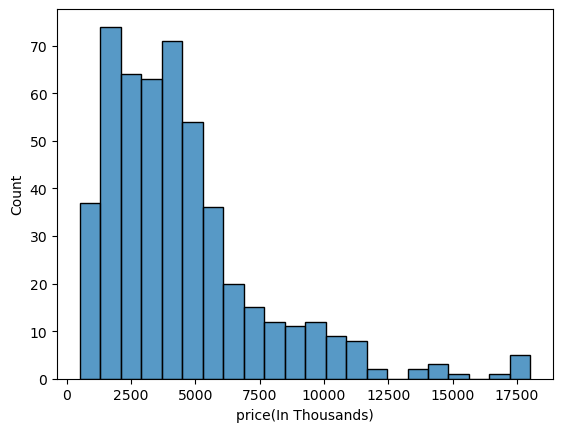

In [78]:
#Hist plot of price in Thousands
sns.histplot(x="price(In Thousands)", data=Final)
plt.show()

In [79]:
Final

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,5489,7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,3820,8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,6390,7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,comfort,2 adults,No breakfast Included,No prepayment needed – pay at the property,3400,9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,15500,8.2,Very good
...,...,...,...,...,...,...,...,...,...
495,Royal Ace Boutique Hotel - Manyata Techpark,Nagavara,Deluxe,1 adult,Breakfast included,No prepayment needed,1980,8.4,Very good
496,Zostel Bangalore,Indiranagar,Bed,1 adult,No breakfast Included,Pre-Payment Required,699,8.6,Fabulous
497,Goldfinch Hotel Bangalore,Gandhi nagar,Superior,2 adults,No breakfast Included,No prepayment needed – pay at the property,3749,7.2,Good
498,Octave Himalaya Monarch,Gandhi nagar,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,1225,7.9,Good


In [80]:
Final.describe()

,price(In Thousands),Ratings
count,500.00000,500.000000
mean,4450.23800,7.641200
std,3086.13369,1.168775
min,500.00000,1.000000
25%,2270.25000,7.100000
50%,3800.50000,7.800000
75%,5558.25000,8.400000
max,18020.00000,10.000000


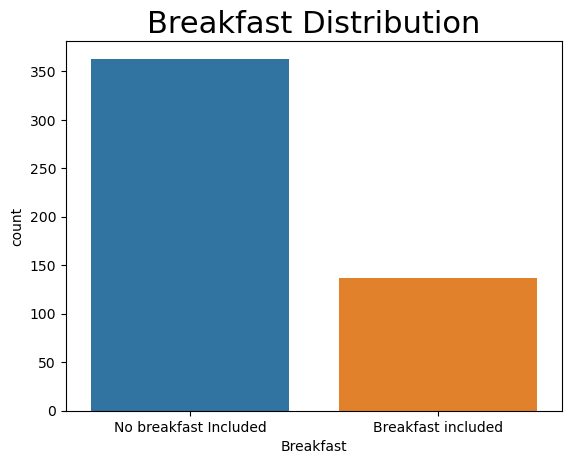

In [144]:
#3
#creating a count plot of Breakfast Distribution
sns.countplot(data=Final, x="Breakfast")
plt.title("Breakfast Distribution",fontsize=22)
plt.xlabel("Breakfast")
plt.ylabel("count")
plt.show()

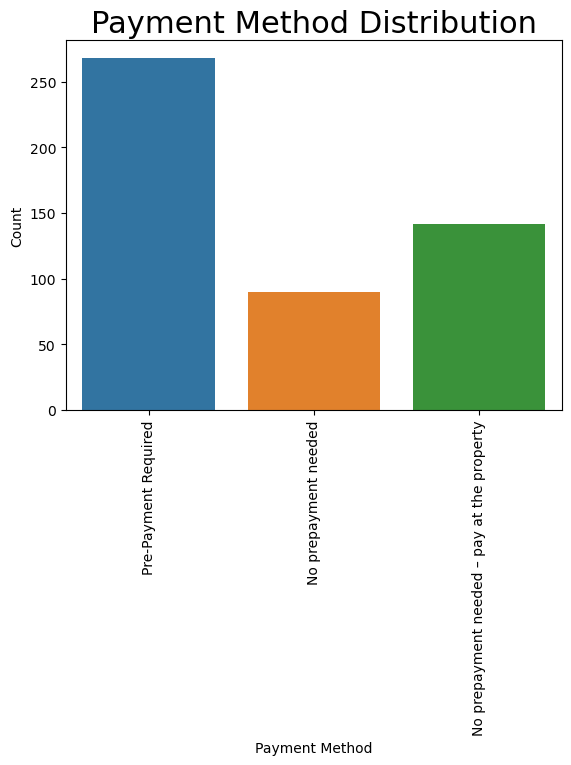

In [142]:
#Creating a count plot based on different payments 
sns.countplot(data=Final, x='Payment Method')
plt.title('Payment Method Distribution',fontsize=22)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

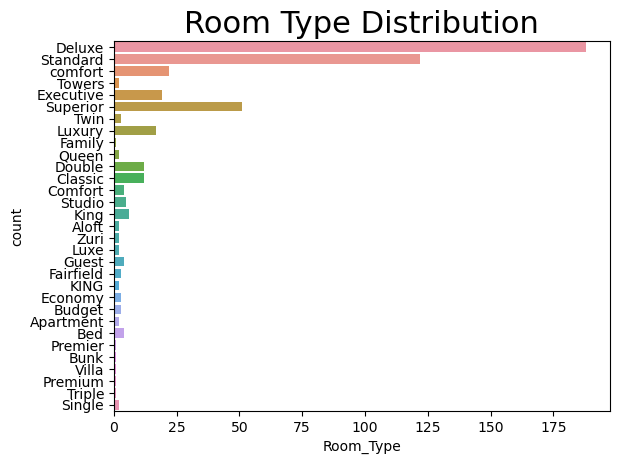

<Figure size 1000x5000 with 0 Axes>

In [141]:
#Creating a count plot based on Room Type Distribution 

sns.countplot(data=Final, y="Room_Type")
plt.title("Room Type Distribution",fontsize=22)
plt.xlabel("Room_Type")
plt.ylabel("count")
plt.figure(figsize=(10,50))
plt.show()

In [84]:
#Displaying first 5 rows
d=Final.head(5)
d

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,5489,7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,3820,8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,6390,7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,comfort,2 adults,No breakfast Included,No prepayment needed – pay at the property,3400,9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,15500,8.2,Very good


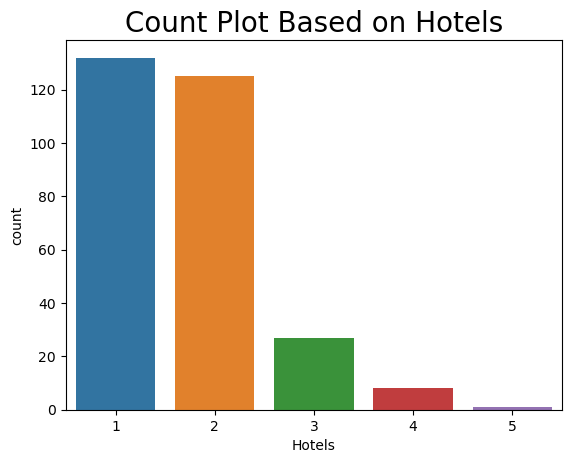

In [139]:
#By using value count, creating a count plot based on Hotels 

sns.countplot(Final["Hotels"].value_counts())
plt.title("Count Plot Based on Hotels",fontsize=20)
plt.show()

In [86]:
Final.head()

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
0,FabHotel Frazer Suites Pulikeshi Nagar,Bangalore,Deluxe,1 adult,No breakfast Included,Pre-Payment Required,5489,7.2,Good
1,Treebo Trend SLN Heritage,Brookefield,Standard,1 adult,Breakfast included,No prepayment needed,3820,8.3,Very good
2,Sarovar Portico Outer Ring Road,Marathahalli,Deluxe,1 adult,No breakfast Included,No prepayment needed – pay at the property,6390,7.3,Good
3,StayMazing -2BHK Flat-5mins to Manyata Tech pa...,Hebbal,comfort,2 adults,No breakfast Included,No prepayment needed – pay at the property,3400,9.6,Exceptional
4,JW Marriott Hotel Bengaluru,Bangalore Shopping Area,Deluxe,1 adult,Breakfast included,No prepayment needed,15500,8.2,Very good


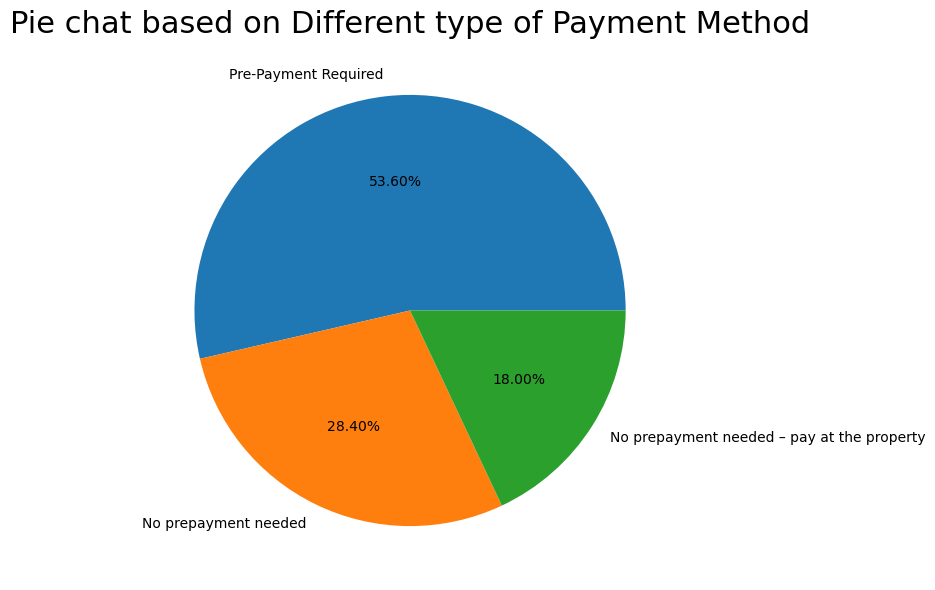

In [136]:
#4
# creating a Pie chat based on Different type of Payment Method
plt.figure(figsize=(13,7))
plt.pie(Final["Payment Method"].value_counts(),labels=Final["Payment Method"].unique(),autopct="%0.02f%%")
plt.title("Pie chat based on Different type of Payment Method",fontsize=22)
plt.show()

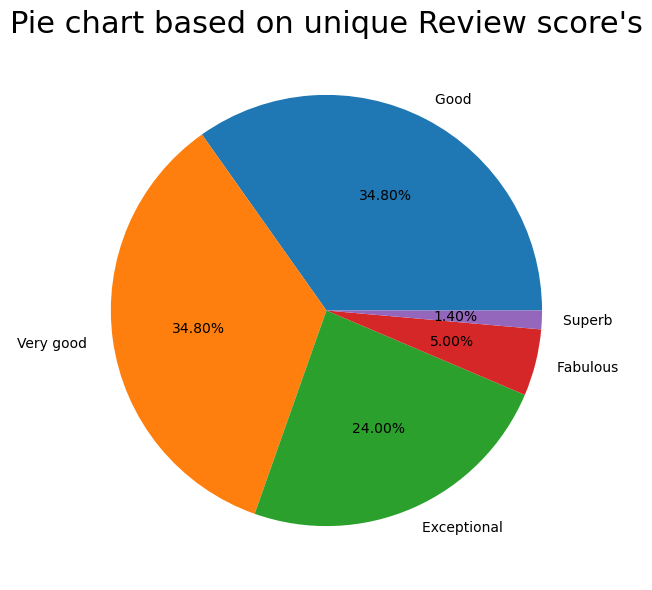

In [133]:
#5
#creating pie chart based on unique review score
plt.figure(figsize=(13,7))
plt.pie(Final["Review_score"].value_counts(),labels=Final["Review_score"].unique(),autopct="%0.02f%%")
plt.title("Pie chart based on unique Review score's",fontsize=22)
plt.show()

## Bi-variate Analysis 

In [89]:
h_p=Final.nlargest(10,"price(In Thousands)")

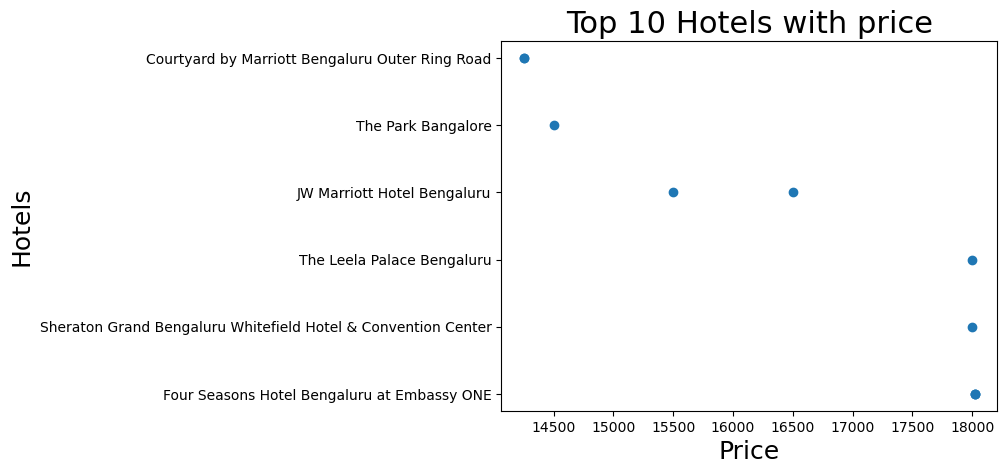

In [90]:
#6
plt.scatter(x="price(In Thousands)",y="Hotels", data= h_p)
plt.title("Top 10 Hotels with price",fontsize=22)
plt.xlabel("Price",fontsize=18)
plt.ylabel("Hotels",fontsize=18)
plt.show()

In [91]:
Final['price(In Thousands)'].sort_values().head()

315    500
247    659
496    699
272    709
408    744
Name: price(In Thousands), dtype: int32

In [92]:
Final1=Final.sort_values("price(In Thousands)")

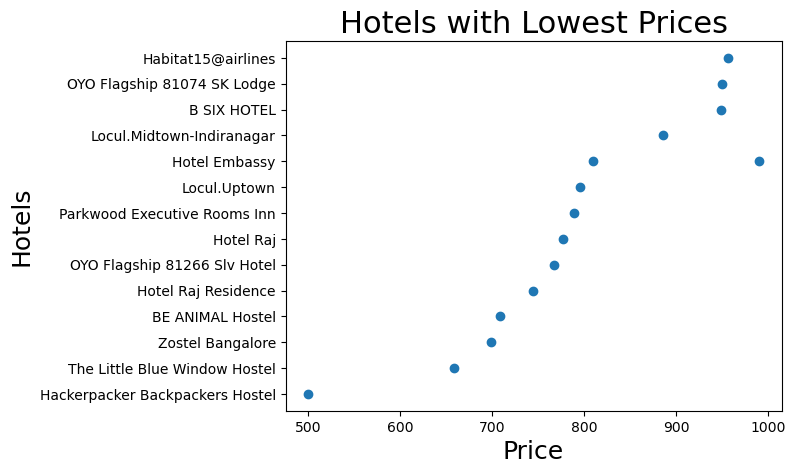

In [93]:
#7
plt.scatter(x=Final1["price(In Thousands)"].head(15),y=Final1["Hotels"].head(15))
plt.title("Hotels with Lowest Prices",fontsize=22)
plt.xlabel("Price",fontsize=18)
plt.ylabel("Hotels",fontsize=18)
plt.show()

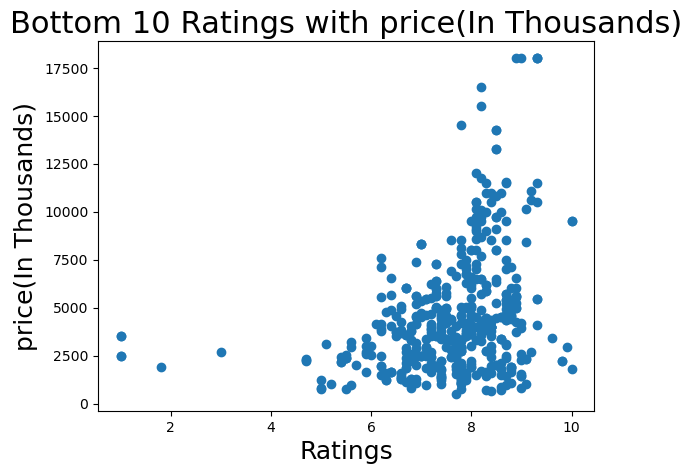

In [95]:
plt.scatter(x="Ratings",y="price(In Thousands)",data=Final)
plt.title("Bottom 10 Ratings with price(In Thousands)",fontsize=22)
plt.xlabel("Ratings",fontsize=18)
plt.ylabel("price(In Thousands)",fontsize=18)
plt.show()

In [96]:
Final.columns

Index(['Hotels', 'Area(In Bangalore)', 'Room_Type', 'Adults', 'Breakfast',
       'Payment Method', 'price(In Thousands)', 'Ratings', 'Review_score'],
      dtype='object')

In [97]:
Final.columns

Index(['Hotels', 'Area(In Bangalore)', 'Room_Type', 'Adults', 'Breakfast',
       'Payment Method', 'price(In Thousands)', 'Ratings', 'Review_score'],
      dtype='object')

In [98]:
Final.dtypes

Hotels                  object
Area(In Bangalore)      object
Room_Type               object
Adults                  object
Breakfast               object
Payment Method          object
price(In Thousands)      int32
Ratings                float64
Review_score            object
dtype: object

In [99]:
Final2=Final.sort_values("Ratings",ascending=False)

In [100]:
Final2

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
183,BLVD Club,Bangalore,Deluxe,2 adults,Breakfast included,Pre-Payment Required,9500,10.0,Exceptional
140,Dhoni Homes -Premium 1 BHK Service Apartment M...,Bangalore,Luxury,2 adults,Breakfast included,No prepayment needed,1800,10.0,Exceptional
427,BLVD Club,Bangalore,Deluxe,1 adult,Breakfast included,Pre-Payment Required,9500,10.0,Exceptional
404,Castle BGR,Bangalore,comfort,1 adult,No breakfast Included,No prepayment needed – pay at the property,2969,9.9,Exceptional
48,Dream Hotel - Richmond,Bangalore,Double,2 adults,No breakfast Included,Pre-Payment Required,2228,9.8,Exceptional
...,...,...,...,...,...,...,...,...,...
144,SPOT ON 81161 Hotel Sri Thirumala Paradise,Bangalore,Standard,2 adults,No breakfast Included,No prepayment needed,1898,1.8,Fabulous
278,Ds cozie comforts inn,Nagavara,Superior,1 adult,No breakfast Included,Pre-Payment Required,2499,1.0,Fabulous
25,Ds cozie comforts inn,Nagavara,Superior,1 adult,No breakfast Included,Pre-Payment Required,2499,1.0,Fabulous
267,Ds cozie comforts inn,Nagavara,Deluxe,2 adults,Breakfast included,Pre-Payment Required,3500,1.0,Fabulous


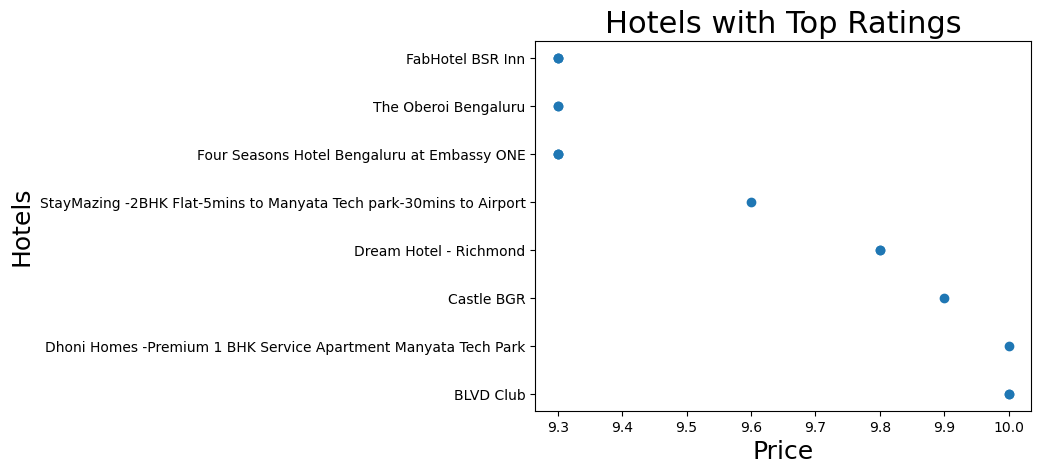

In [101]:
#8
plt.scatter(x=Final2["Ratings"].head(15),y=Final2["Hotels"].head(15))
plt.title("Hotels with Top Ratings",fontsize=22)
plt.xlabel("Price",fontsize=18)
plt.ylabel("Hotels",fontsize=18)
plt.show()

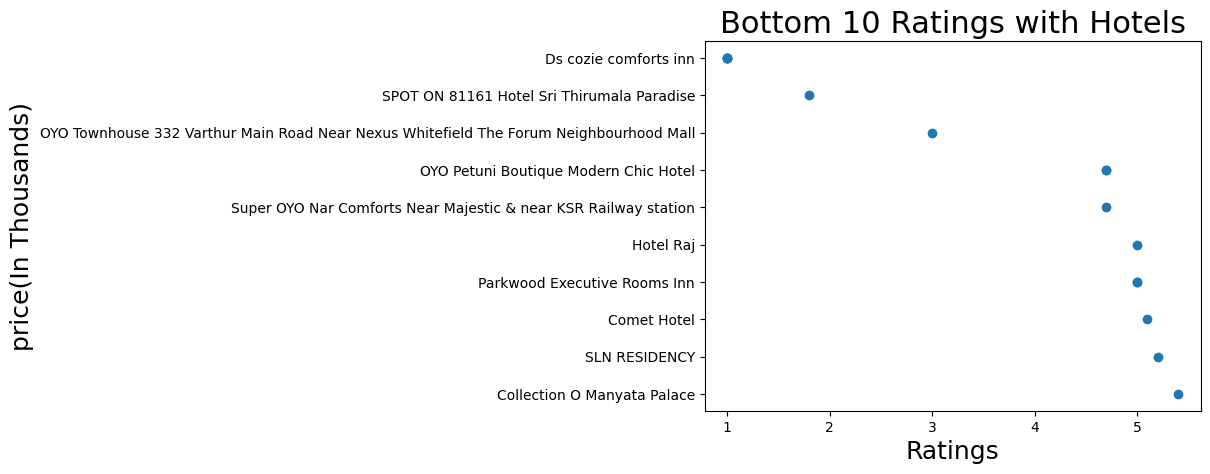

In [102]:
#9
plt.scatter(x=Final2["Ratings"].tail(15),y=Final2["Hotels"].tail(15))
plt.title("Bottom 10 Ratings with Hotels",fontsize=22)
plt.xlabel("Ratings",fontsize=18)
plt.ylabel("price(In Thousands)",fontsize=18)
plt.show()

In [103]:
Final["Room_Type"].value_counts()

Deluxe       188
Standard     122
Superior      51
comfort       22
Executive     19
Luxury        17
Classic       12
Double        12
King           6
Studio         5
Comfort        4
Guest          4
Bed            4
Fairfield      3
Twin           3
Economy        3
Budget         3
Apartment      2
KING           2
Aloft          2
Luxe           2
Zuri           2
Queen          2
Towers         2
Single         2
Family         1
Premier        1
Bunk           1
Villa          1
Premium        1
Triple         1
Name: Room_Type, dtype: int64

In [104]:
Final1=Final.sort_values("price(In Thousands)")

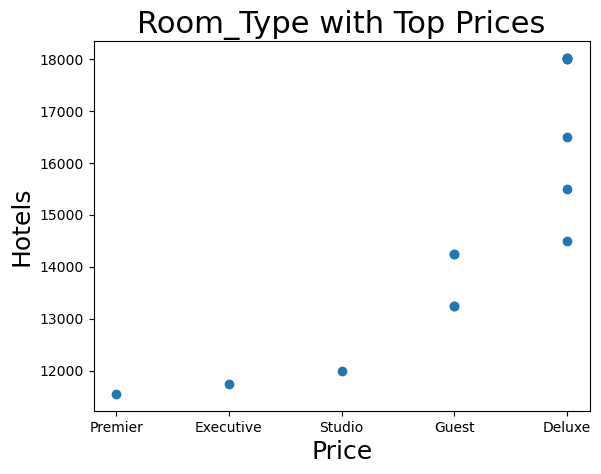

In [105]:
plt.scatter(x=Final1["Room_Type"].tail(15),y=Final1["price(In Thousands)"].tail(15))
plt.title("Room_Type with Top Prices",fontsize=22)
plt.xlabel("Price",fontsize=18)
plt.ylabel("Hotels",fontsize=18)
plt.show()

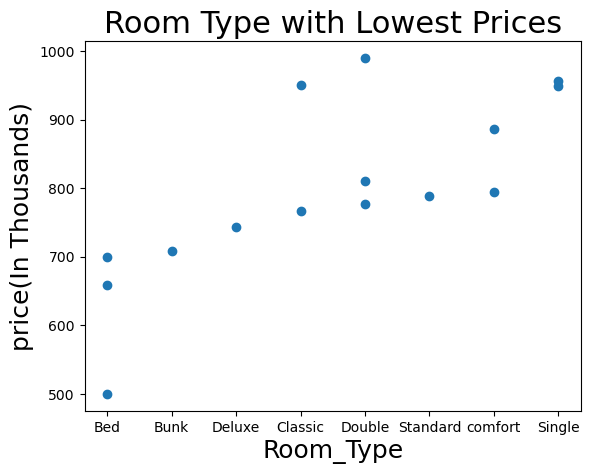

In [106]:
#lowest
plt.scatter(x=Final1["Room_Type"].head(15),y=Final1["price(In Thousands)"].head(15))
plt.title("Room Type with Lowest Prices",fontsize=22)
plt.xlabel("Room_Type",fontsize=18)
plt.ylabel("price(In Thousands)",fontsize=18)
plt.show()

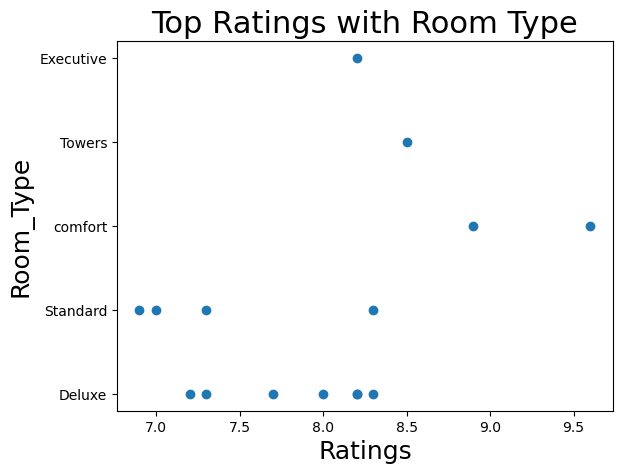

In [107]:
plt.scatter(x=Final["Ratings"].head(15),y=Final["Room_Type"].head(15))
plt.title("Top Ratings with Room Type",fontsize=22)
plt.xlabel("Ratings",fontsize=18)
plt.ylabel("Room_Type",fontsize=18)
plt.show()

## Multi-Variant 

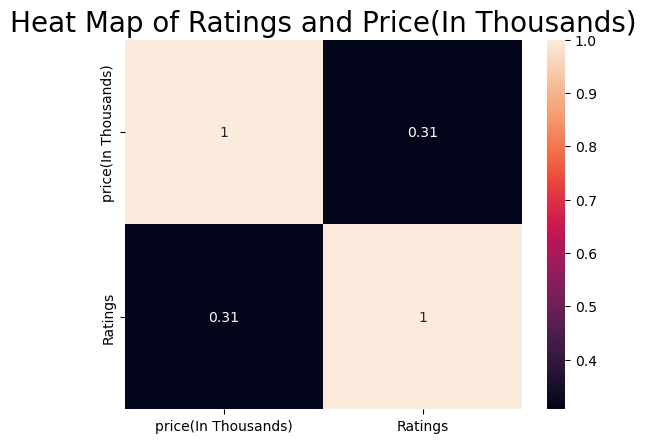

In [147]:
#10
sns.heatmap(Final.corr(),annot=True)
plt.title("Heat Map of Ratings and Price(In Thousands)",fontsize=20)
plt.show()

In [109]:
Final2.columns

Index(['Hotels', 'Area(In Bangalore)', 'Room_Type', 'Adults', 'Breakfast',
       'Payment Method', 'price(In Thousands)', 'Ratings', 'Review_score'],
      dtype='object')

In [110]:
Final2

,Hotels,Area(In Bangalore),Room_Type,Adults,Breakfast,Payment Method,price(In Thousands),Ratings,Review_score
183,BLVD Club,Bangalore,Deluxe,2 adults,Breakfast included,Pre-Payment Required,9500,10.0,Exceptional
140,Dhoni Homes -Premium 1 BHK Service Apartment M...,Bangalore,Luxury,2 adults,Breakfast included,No prepayment needed,1800,10.0,Exceptional
427,BLVD Club,Bangalore,Deluxe,1 adult,Breakfast included,Pre-Payment Required,9500,10.0,Exceptional
404,Castle BGR,Bangalore,comfort,1 adult,No breakfast Included,No prepayment needed – pay at the property,2969,9.9,Exceptional
48,Dream Hotel - Richmond,Bangalore,Double,2 adults,No breakfast Included,Pre-Payment Required,2228,9.8,Exceptional
...,...,...,...,...,...,...,...,...,...
144,SPOT ON 81161 Hotel Sri Thirumala Paradise,Bangalore,Standard,2 adults,No breakfast Included,No prepayment needed,1898,1.8,Fabulous
278,Ds cozie comforts inn,Nagavara,Superior,1 adult,No breakfast Included,Pre-Payment Required,2499,1.0,Fabulous
25,Ds cozie comforts inn,Nagavara,Superior,1 adult,No breakfast Included,Pre-Payment Required,2499,1.0,Fabulous
267,Ds cozie comforts inn,Nagavara,Deluxe,2 adults,Breakfast included,Pre-Payment Required,3500,1.0,Fabulous


In [111]:
Final_2=Final.sort_values("price(In Thousands)",ascending=False)

In [112]:
Final_2=Final_2.head(10)

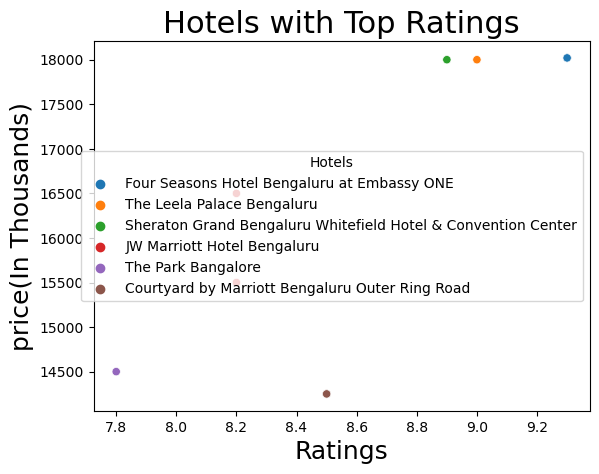

In [113]:
sns.scatterplot(x="Ratings",y="price(In Thousands)",hue='Hotels',data=Final_2)
plt.title("Hotels with Top Ratings",fontsize=22)
plt.xlabel("Ratings",fontsize=18)
plt.ylabel("price(In Thousands)",fontsize=18)
plt.show()

<BarContainer object of 500 artists>

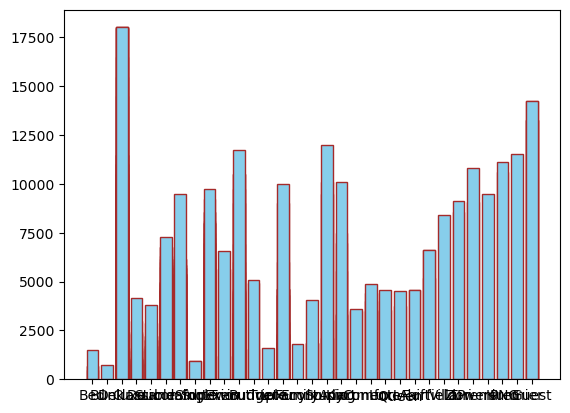

In [114]:
plt.bar(Final1["Room_Type"],Final1["price(In Thousands)"], color= "skyblue",linewidth=1,edgecolor='brown')

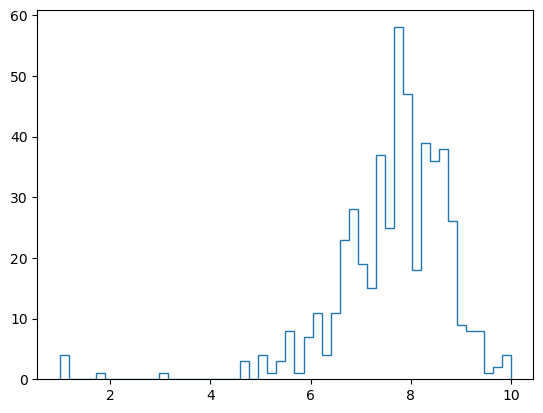

In [115]:
plt.hist(Final1["Ratings"],bins = 50,histtype='step',rwidth=0.90)
plt.show()

In [116]:
x=Final["Ratings"]

In [117]:
y=Final["Room_Type"]

In [118]:
x

0      7.2
1      8.3
2      7.3
3      9.6
4      8.2
      ... 
495    8.4
496    8.6
497    7.2
498    7.9
499    7.3
Name: Ratings, Length: 500, dtype: float64

In [119]:
y

0        Deluxe
1      Standard
2        Deluxe
3       comfort
4        Deluxe
         ...   
495      Deluxe
496         Bed
497    Superior
498      Deluxe
499      Deluxe
Name: Room_Type, Length: 500, dtype: object

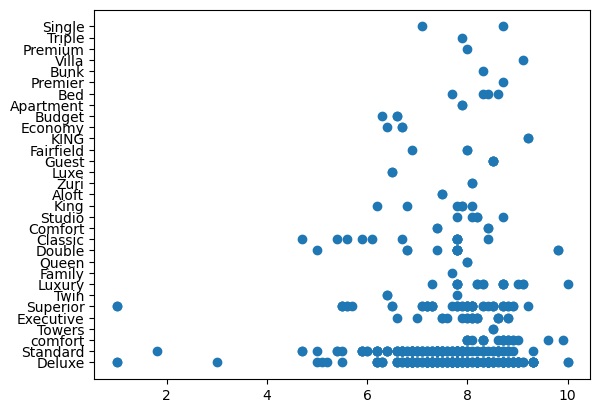

In [120]:
plt.scatter(x,y)

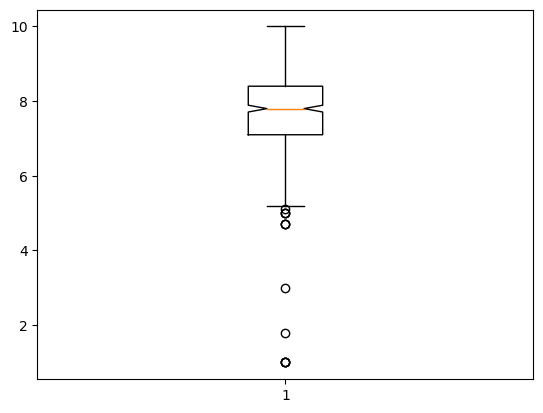

In [121]:
plt.boxplot(x,notch= True)
plt.show()

<AxesSubplot:xlabel='Ratings'>

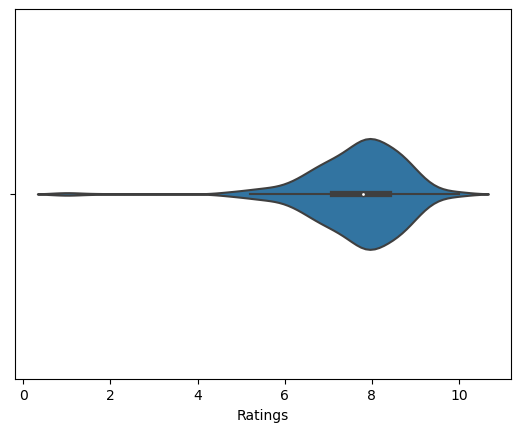

In [122]:
sns.violinplot(x= "Ratings", data= Final, width=0.3)

<AxesSubplot:xlabel='Ratings', ylabel='Density'>

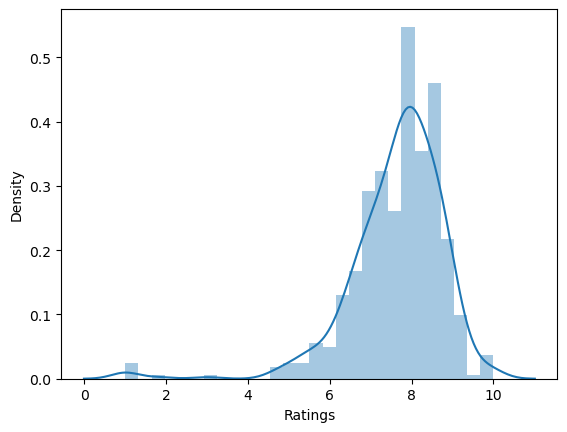

In [123]:
sns.distplot(Final["Ratings"])